<a href="https://colab.research.google.com/github/paolopierdo/Various/blob/main/prova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyRegressor
#from sklego.meta import Thresholder, GroupedPredictor, DecayEstimator
from sklearn.compose import ColumnTransformer
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from sklego.datasets import make_simpleseries
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, QuantileTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.datasets import load_iris, make_classification, make_blobs #genera dati casuali per clustering
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import silhouette_score, classification_report, roc_curve, make_scorer, accuracy_score, confusion_matrix, mean_squared_error, r2_score, precision_score, recall_score

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

In [ ]:
# 2. Convertire 'native-country' in variabile binaria (1 se 'United States', 0 altrimenti)
data['native-country'] = data['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)
data['sex'] = data['sex'].apply(lambda x: 1 if x == 'Male' else 0)
# Creiamo variabili binarie per income
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
data['race'] = data['race'].apply(lambda x: 1 if x == 'White' else 0)
data['workclass'] = data['workclass'].apply(lambda x: 1 if x == 'Private' else 0)
data['education'] = data['education'].apply(lambda x: 1 if x in ['Bachelors', 'Masters', 'Some-college'] else 0)
data['marital-status'] = data['marital-status'].apply(lambda x: 1 if x == 'Married-civ-spouse'  else 0)

# Lista delle colonne da eliminare
columns_to_drop = ['occupation', 'relationship']

# Eliminare le colonne dal dataset
df = data.drop(columns=columns_to_drop)

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,1,13,0,1,1,2174,0,40,1,0
1,50,0,83311,1,13,1,1,1,0,0,13,1,0
2,38,1,215646,0,9,0,1,1,0,0,40,1,0
3,53,1,234721,0,7,1,0,1,0,0,40,1,0
4,28,1,338409,1,13,1,0,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,1,257302,0,12,1,1,0,0,0,38,1,0
32557,40,1,154374,0,9,1,1,1,0,0,40,1,1
32558,58,1,151910,0,9,0,1,0,0,0,40,1,0
32559,22,1,201490,0,9,0,1,1,0,0,20,1,0


In [ ]:
df['workclass'].value_counts()

,count
workclass,
1,22696
0,9865


In [ ]:
X = df.iloc[:, :-1]
y = df['income']

In [ ]:
numeric_features = ['age', 'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']  # inserisci qui le tue colonne numeriche

preprocessor = ColumnTransformer(
    transformers=[
        ('num', QuantileTransformer(n_quantiles=100), numeric_features)
    ],
    remainder='passthrough'  # mantiene le altre colonne invariate
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30)

## KNN

In [ ]:
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", KNeighborsClassifier())
])

In [ ]:
model = GridSearchCV(estimator=pipe,
             param_grid = {'model__n_neighbors':[11,25,51,101]},
                    cv=5)

In [ ]:
model.fit(X,y)
pd.DataFrame(model.cv_results_) #very important to evaluate the CV

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.317442,0.217186,3.869950,2.135456,11,{'model__n_neighbors': 11},0.820820,0.821867,0.831235,0.831388,0.828163,0.826695,0.004530,4
1,0.124079,0.021486,2.143851,0.338759,25,{'model__n_neighbors': 25},0.824351,0.826628,0.832310,0.833538,0.827396,0.828844,0.003500,3
2,0.102913,0.013923,2.127266,0.299205,51,{'model__n_neighbors': 51},0.822202,0.829699,0.831849,0.837531,0.833845,0.831025,0.005110,2
3,0.093375,0.021895,2.234717,0.209305,101,{'model__n_neighbors': 101},0.825426,0.831542,0.835381,0.837531,0.827088,0.831394,0.004642,1


In [ ]:
model.best_params_

{'model__n_neighbors': 101}

In [ ]:
pipe=Pipeline([
    ("preprocessor", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=101))
])
pipe.fit(X_train, y_train)
pred_knn=pipe.predict(X_test)

In [ ]:
# Valuta il modello
print(classification_report(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4970
           1       0.71      0.54      0.61      1543

    accuracy                           0.84      6513
   macro avg       0.79      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513

[[4635  335]
 [ 712  831]]


## Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [5, 20],
    'min_samples_split': [2,8],
    'min_samples_leaf': [ 2, 5],
    'bootstrap': [True],
    'max_features': ['sqrt']
}

# Crea il modello RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Setup di GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10,
                           scoring='accuracy', n_jobs=-1, verbose=2)

# Esegui la grid search
grid_search.fit(X_train, y_train)

# Migliori parametri trovati
print("Migliori parametri:", grid_search.best_params_)

# Usa il miglior modello per fare predizioni
best_rfc = grid_search.best_estimator_
pred_rfc = best_rfc.predict(X_test)

print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Migliori parametri: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4970
           1       0.79      0.60      0.68      1543

    accuracy                           0.87      6513
   macro avg       0.84      0.77      0.80      6513
weighted avg       0.86      0.87      0.86      6513

[[4728  242]
 [ 624  919]]


## Logistic regression

In [ ]:
lr = LogisticRegression(C=1,max_iter = 500)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4970
           1       0.70      0.27      0.39      1543

    accuracy                           0.80      6513
   macro avg       0.76      0.62      0.64      6513
weighted avg       0.78      0.80      0.76      6513

[[4790  180]
 [1122  421]]


C:\Users\pierd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## voting classifier

In [ ]:
# try to remove non discriminant variables
columns_to_drop = ['race', 'native-country']
df1 = df.drop(columns=columns_to_drop)

In [ ]:
X = df1.iloc[:, :-1]
y = df1['income']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30)

In [ ]:
numerical_features = ['age', 'fnlwgt','capital-gain', 'capital-loss', 'hours-per-week','education-num']

# Crea il preprocessore
preprocessor = ColumnTransformer(
    transformers=[
        ('num', QuantileTransformer(), numerical_features)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
    # Lascia intatte le altre colonne
)

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=101).fit(X,y)
clf2 = RandomForestClassifier(bootstrap= True, max_depth= 20, max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 2, n_estimators= 500).fit(X,y)
clf3 = LogisticRegression(C=1,penalty='l2')
clf4 = VotingClassifier(estimators=[('clf1',clf1),('clf2',clf2),('clf3',clf3)],
                                    voting='hard', weights=[2,5,0.2])
clf4.fit(X,y)

C:\Users\pierd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('clf1', KNeighborsClassifier(n_neighbors=101)),
                             ('clf2',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=5,
                                                     n_estimators=500)),
                             ('clf3', LogisticRegression(C=1))],
                 weights=[2, 5, 0.2])

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', clf4)])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num', QuantileTransformer(),
                                                  ['age', 'fnlwgt',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week',
                                                   'education-num'])])),
                ('classifier',
                 VotingClassifier(estimators=[('clf1',
                                               KNeighborsClassifier(n_neighbors=101)),
                                              ('clf2',
                                               RandomForestClassifier(max_depth=20,
                                                                      min_samples_leaf=5,
                                                                      n_estimators=500)),
                                              ('clf3',
                                               LogisticRegression(C=1))],
                                  weights=[2, 5, 0.2]))])

In [ ]:
predictions = pipeline.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      4970
           1       0.78      0.49      0.60      1543

    accuracy                           0.85      6513
   macro avg       0.82      0.72      0.75      6513
weighted avg       0.84      0.85      0.83      6513

[[4750  220]
 [ 784  759]]


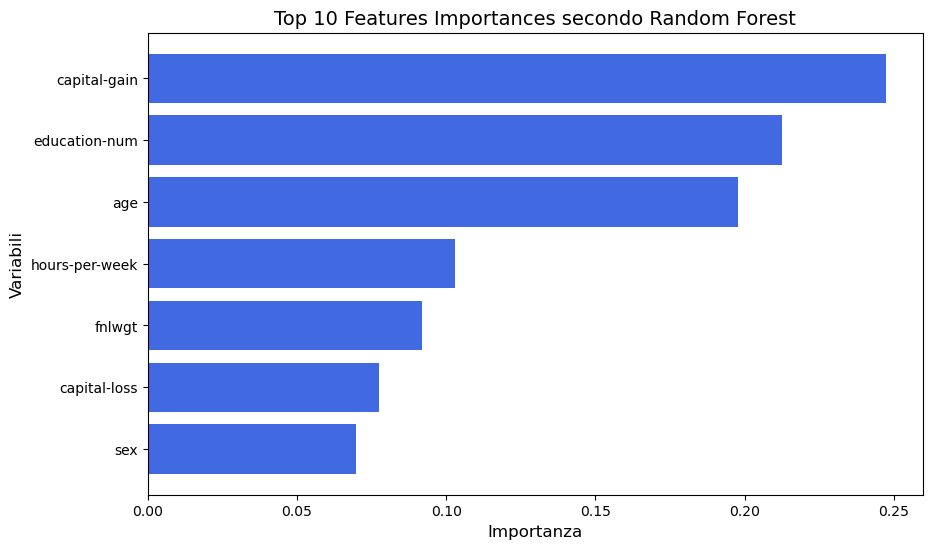

In [ ]:
# Ottenere le importanze delle feature
feature_importances = clf2.feature_importances_
feature_names = X.columns  # I nomi delle feature usate nel modello

# Creare un DataFrame con feature names e feature importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordinare per importanza decrescente
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot delle prime 10 variabili più importanti
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'][:10], importances_df['Importance'][:10], color='royalblue')
plt.gca().invert_yaxis()  # Invertire l'asse Y per avere la variabile più importante in alto
plt.title('Top 10 Features Importances secondo Random Forest', fontsize=14)
plt.xlabel('Importanza', fontsize=12)
plt.ylabel('Variabili', fontsize=12)
plt.show()

In [ ]:
def calculate_weights(p1, p2, p3):
    # Calcola la somma totale dei punteggi
    total = p1 + p2 + p3
    # Calcola i pesi come proporzioni
    w1 = p1 / total
    w2 = p2 / total
    w3 = p3 / total
    return w1, w2, w3

In [ ]:
# Esempio di utilizzo
p1 = 0.83-0.5
p2 = 0.85-0.5
p3 = 0.8-0.5

weights = calculate_weights(p1, p2, p3)
print("Pesi:", weights)

Pesi: (0.336734693877551, 0.35714285714285715, 0.3061224489795919)


In [ ]:
##### WEIGHTED AVERAGE
weighted_average = (0.3*XGB_pred+
                    0.2*DecisionTree_pred+
                    0.2*RandomForest_pred+
                    0.15*MLPC_pred+
                    0.15*KNN_pred)